# FINA60202 : TP2

In [24]:
import csv
import numpy as np
import pandas as pd
import gurobipy as gp
from gurobipy import GRB
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import gurobipy as gp
from gurobipy import GRB
from scipy.optimize import minimize
import os
import Functions as f
import statsmodels.api as sm
import warnings

## Partie A

In [25]:
# Ignorer les avertissements de type FutureWarning et DtypeWarning pour une meilleure lisibilité des résultats
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=pd.errors.DtypeWarning)

Optimization non réussie. Impossible de retrouver la solution à cette date précise.
Optimization failed for the window ending on 1932-05-01 00:00:00
Optimization non réussie. Impossible de retrouver la solution à cette date précise.
Optimization failed for the window ending on 1932-06-01 00:00:00
Optimization non réussie. Impossible de retrouver la solution à cette date précise.
Optimization failed for the window ending on 1933-02-01 00:00:00
Optimization non réussie. Impossible de retrouver la solution à cette date précise.
Optimization failed for the window ending on 1933-03-01 00:00:00
Optimization non réussie. Impossible de retrouver la solution à cette date précise.
Optimization failed for the window ending on 1933-04-01 00:00:00
Optimization non réussie. Impossible de retrouver la solution à cette date précise.
Optimization failed for the window ending on 1941-12-01 00:00:00
Optimization non réussie. Impossible de retrouver la solution à cette date précise.
Optimization failed fo

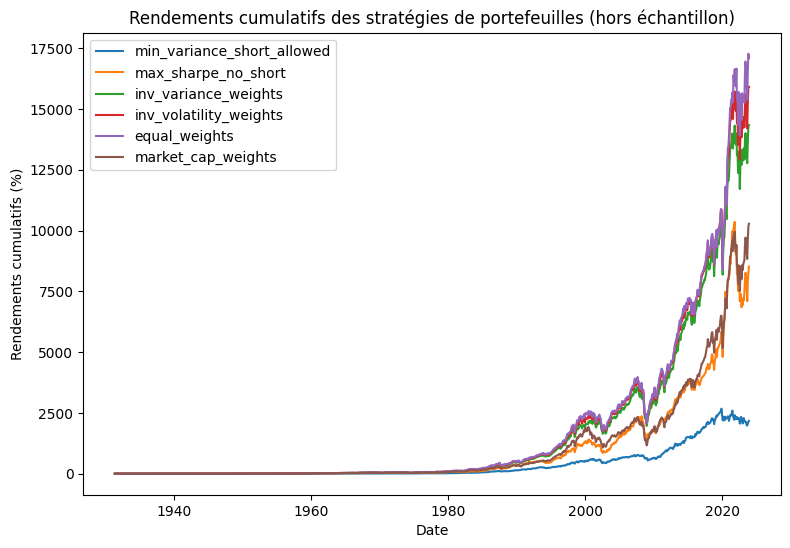

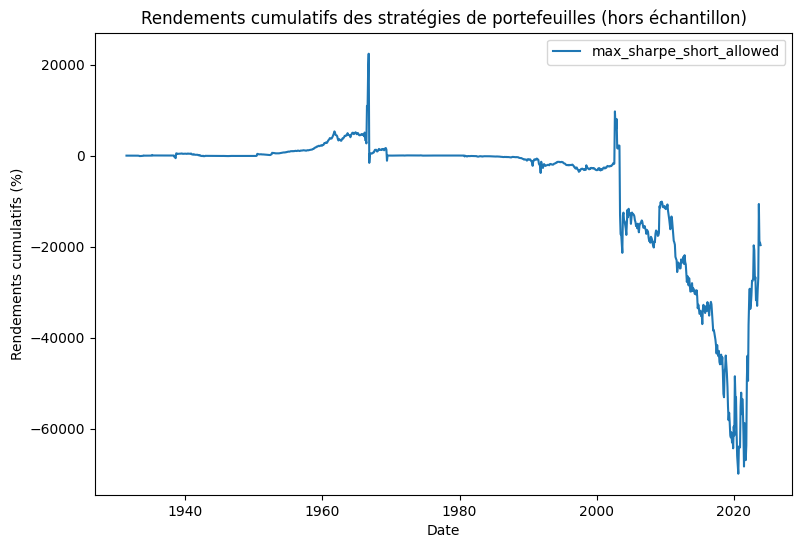

In [26]:
# Import data and clean
csv_file_path_10ind        = '/Users/thomasdeconinck/Documents/GitHub/Gestion de Portefeuille Devoir 2/Partie A/Data /10_Industry_Portfolios.CSV'
df_10Ind                   = f.importClean_Ind(csv_file_path_10ind, desired_returns= 'Average Value Weighted Returns -- Monthly')

csv_file_path_rf           = '/Users/thomasdeconinck/Documents/GitHub/Gestion de Portefeuille Devoir 2/Partie A/Data /F-F_Research_Data_Factors.CSV'
df_rf                      = f.importClean_rf(csv_file_path_rf)

csv_file_path_number_firm  = '/Users/thomasdeconinck/Documents/GitHub/Gestion de Portefeuille Devoir 2/Partie A/Data /10_Industry_Portfolios.CSV'
df_number_firm             = f.importClean_Ind(csv_file_path_number_firm, desired_returns='Number of Firms in Portfolios')

csv_file_path_avg_firm_size= '/Users/thomasdeconinck/Documents/GitHub/Gestion de Portefeuille Devoir 2/Partie A/Data /10_Industry_Portfolios.CSV'
df_average_firm_size       = f.importClean_Ind(csv_file_path_avg_firm_size, desired_returns='Average Firm Size')


# Rolling window optimization and out of sample portfolio returns calculation 1)2)3)4)5)6)7)
min_variance_short_allowed = f.Out_of_sample_portfolio_returns(f.rolling_window_optimization(df_10Ind, df_rf, df_average_firm_size, df_number_firm, 60, optimization_type= 'min_variance_short_allowed'), df_10Ind)
max_sharpe_no_short        = f.Out_of_sample_portfolio_returns(f.rolling_window_optimization(df_10Ind, df_rf, df_average_firm_size, df_number_firm, 60, optimization_type= 'max_sharpe_no_short'), df_10Ind)
max_sharpe_short_allowed   = f.Out_of_sample_portfolio_returns(f.rolling_window_optimization(df_10Ind, df_rf, df_average_firm_size, df_number_firm, 60, optimization_type= 'max_sharpe_short_allowed'), df_10Ind)
inv_variance_weights       = f.Out_of_sample_portfolio_returns(f.rolling_window_optimization(df_10Ind, df_rf, df_average_firm_size, df_number_firm, 60, optimization_type= 'inv_variance_weights'), df_10Ind)
inv_volatility_weights     = f.Out_of_sample_portfolio_returns(f.rolling_window_optimization(df_10Ind, df_rf, df_average_firm_size, df_number_firm, 60, optimization_type= 'inv_volatility_weights'), df_10Ind)
equal_weights              = f.Out_of_sample_portfolio_returns(f.rolling_window_optimization(df_10Ind, df_rf, df_average_firm_size, df_number_firm, 60, optimization_type= 'equal_weights'), df_10Ind)
market_cap_weights         = f.Out_of_sample_portfolio_returns(f.rolling_window_optimization(df_10Ind, df_rf, df_average_firm_size, df_number_firm, 60, optimization_type= 'market_cap_weights'), df_10Ind)


# Plot cumulative returns for out of sample portfolio returns 
strategies                 = ['min_variance_short_allowed', 'max_sharpe_no_short', 'inv_variance_weights', 'inv_volatility_weights', 'equal_weights', 'market_cap_weights']
f.plot_cumulative_returns(df_10Ind, strategies, df_rf, df_average_firm_size, df_number_firm)


# Plot cumulative returns for out of sample portfolio returns for max_sharpe_short_allowed strategy (3)
strategies                 = ['max_sharpe_short_allowed']
f.plot_cumulative_returns(df_10Ind, strategies, df_rf, df_average_firm_size, df_number_firm)

In [18]:
# Sharpe Ratio calculation for backtested portfolio 1)2)3)4)5)6)7)

Sharpe_ratio_df  = f.annualized_statistics_and_sharpe_ratios({
    'Min Variance Optimization': min_variance_short_allowed,
    'Max Sharpe No Short': max_sharpe_no_short,
    'Max Sharpe Short Allowed': max_sharpe_short_allowed,
    'Inv Variance Port': inv_variance_weights,
    'Inv Volatility Port': inv_volatility_weights,
    'EW Port': equal_weights,
    'VW Port': market_cap_weights
},
[('1931-07-01', '2023-12-31'), ('1990-01-01','2023-12-31'), ('2000-01-01', '2023-12-31')],df_rf, is_decimal=False)

Sharpe_ratio_df

Annualized Mean Return  \
Strategy                  Start Date End Date                            
Min Variance Optimization 1931-07-01 2023-12-31                 9.4925   
                          1990-01-01 2023-12-31                 9.1824   
                          2000-01-01 2023-12-31                 6.9988   
Max Sharpe No Short       1931-07-01 2023-12-31                12.1084   
                          1990-01-01 2023-12-31                11.3122   
                          2000-01-01 2023-12-31                 9.5509   
Max Sharpe Short Allowed  1931-07-01 2023-12-31               -16.3217   
                          1990-01-01 2023-12-31               -25.2806   
                          2000-01-01 2023-12-31               -42.1318   
Inv Variance Port         1931-07-01 2023-12-31                12.3849   
                          1990-01-01 2023-12-31                11.6680   
                          2000-01-01 2023-12-31                 9.6439   
Inv Volatility Port       1931-07-01 2023-12-31                12.6438   
                          1990-01-01 2023-12-31                11.9123   
                          2000-01-01 2023-12-31                 9.7234   
EW Port                   1931-07-01 2023-12-31                12.8817   
                          1990-01-01 2023-12-31                12.1968   
                          2000-01-01 2023-12-31                 9.8343   
VW Port                   1931-07-01 2023-12-31                12.3751   
                          1990-01-01 2023-12-31                11.9868   
                          2000-01-01 2023-12-31                 9.0984   

                                                Annualized Std Deviation  \
Strategy                  Start Date End Date                              
Min Variance Optimization 1931-07-01 2023-12-31                  12.4969   
                          1990-01-01 2023-12-31                  12.2473   
                          2000-01-01 2023-12-31                  12.5458   
Max Sharpe No Short       1931-07-01 2023-12-31                  17.3420   
                          1990-01-01 2023-12-31                  15.0376   
                          2000-01-01 2023-12-31                  15.3775   
Max Sharpe Short Allowed  1931-07-01 2023-12-31                 501.2777   
                          1990-01-01 2023-12-31                 171.6034   
                          2000-01-01 2023-12-31                 200.2431   
Inv Variance Port         1931-07-01 2023-12-31                  16.1342   
                          1990-01-01 2023-12-31                  13.1647   
                          2000-01-01 2023-12-31                  13.6974   
Inv Volatility Port       1931-07-01 2023-12-31                  16.8530   
                          1990-01-01 2023-12-31                  13.7374   
                          2000-01-01 2023-12-31                  14.3608   
EW Port                   1931-07-01 2023-12-31                  17.6383   
                          1990-01-01 2023-12-31                  14.5562   
                          2000-01-01 2023-12-31                  15.3394   
VW Port                   1931-07-01 2023-12-31                  18.0501   
                          1990-01-01 2023-12-31                  15.2429   
                          2000-01-01 2023-12-31                  15.8686   

                                                Sharpe Ratio  
Strategy                  Start Date End Date                 
Min Variance Optimization 1931-07-01 2023-12-31       0.4986  
                          1990-01-01 2023-12-31       0.4834  
                          2000-01-01 2023-12-31       0.2979  
Max Sharpe No Short       1931-07-01 2023-12-31       0.5101  
                          1990-01-01 2023-12-31       0.5353  
                          2000-01-01 2023-12-31       0.4090  
Max Sharpe Short Allowed  1931-07-01 2023-12-31      -0.0391  
                          199

## Partie B

In [19]:
# 2 Fama-French factors and Momentum factor data and calculation
# 1) SMB (Small Minus Big) : Market capitalization
market_caps                 = df_average_firm_size.multiply(df_number_firm)

# 2) HML (High Minus Low) : Book to Market ratio
csv_file_path_BtoM          = '/Users/thomasdeconinck/Downloads/Gestion-de-Portefeuille-Devoir-2/Partie A/Data /48_Industry_Portfolios.CSV'
df_BtoM                     = f.importClean_Ind(csv_file_path_BtoM, desired_returns='Sum of BE / Sum of ME')
df_BtoM                     = df_BtoM.loc[df_BtoM.index.repeat(12)]
df_BtoM                     = df_BtoM.iloc[:len(df_48Ind)]
df_BtoM.index               = df_48Ind.index

# 3) UMD (Up Minus Down) : momentum (average of 12 months)
df_mom                      = df_48Ind.rolling(window=12, min_periods=12).mean()
df_mom.replace(-99.99, np.nan, inplace = True)
df_mom.replace(-999, np.nan, inplace = True)
df_mom.dropna(inplace = True)


# S'assurer que les données sont sur la même période de temps 
df_BtoM                    = df_BtoM.reindex(df_mom.index)
market_caps                = market_caps.reindex(df_mom.index)
df_48Ind                   = df_48Ind.reindex(df_mom.index)



/Users/thomasdeconinck/Downloads/Gestion-de-Portefeuille-Devoir-2/TP2_File/Functions.py:73: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_AEWR_monthly.replace(-99.99, np.nan, inplace=True)


## Partie C

In [20]:
# Import data and clean
csv_file_path_10ind         = '/Users/thomasdeconinck/Downloads/Gestion-de-Portefeuille-Devoir-2/Partie A/Data /48_Industry_Portfolios.CSV'
df_48Ind                    = f.importClean_Ind(csv_file_path_10ind, desired_returns='Average Value Weighted Returns -- Monthly')

csv_file_path_number_firm   = '/Users/thomasdeconinck/Downloads/Gestion-de-Portefeuille-Devoir-2/Partie A/Data /48_Industry_Portfolios.CSV'
df_number_firm              = f.importClean_Ind(csv_file_path_number_firm, desired_returns='Number of Firms in Portfolios')
df_number_firm              = df_number_firm[df_number_firm.index >= df_48Ind.index.min()]

csv_file_path_avg_firm_size = '/Users/thomasdeconinck/Downloads/Gestion-de-Portefeuille-Devoir-2/Partie A/Data /48_Industry_Portfolios.CSV'
df_average_firm_size        = f.importClean_Ind(csv_file_path_avg_firm_size, desired_returns='Average Firm Size')


# 2 Fama-French factors and Momentum factor data and calculation
# 1) SMB (Small Minus Big) : Market capitalization
market_caps                 = df_average_firm_size.multiply(df_number_firm)

# 2) HML (High Minus Low) : Book to Market ratio
csv_file_path_BtoM          = '/Users/thomasdeconinck/Downloads/Gestion-de-Portefeuille-Devoir-2/Partie A/Data /48_Industry_Portfolios.CSV'
df_BtoM                     = f.importClean_Ind(csv_file_path_BtoM, desired_returns='Sum of BE / Sum of ME')
df_BtoM                     = df_BtoM.loc[df_BtoM.index.repeat(12)]
df_BtoM                     = df_BtoM.iloc[:len(df_48Ind)]
df_BtoM.index               = df_48Ind.index

# 3) UMD (Up Minus Down) : momentum (average of 12 months)
df_mom                      = df_48Ind.rolling(window=12, min_periods=12).mean()
df_mom.replace(-99.99, np.nan, inplace = True)
df_mom.replace(-999, np.nan, inplace = True)
df_mom.dropna(inplace = True)


# S'assurer que les données sont sur la même période de temps 
df_BtoM                    = df_BtoM.reindex(df_mom.index)
market_caps                = market_caps.reindex(df_mom.index)
df_48Ind                   = df_48Ind.reindex(df_mom.index)


# Standardize the data for the 3 factors
MC_standardized            = f.standardize(market_caps)
BM_standardized            = f.standardize(df_BtoM)  
MOM_standardized           = f.standardize(df_mom)


# Inputs pour le problème de maximisation (Equation (6) de l'article) 

# Rp,t+1 : Rendements des 48 industries à t+1 
returns                   = df_48Ind.shift(-1).dropna()

# Poids du portefeuille de marché (Market Portfolio) à t
mkt_weights               = market_caps / market_caps.sum(axis=1).values.reshape(-1, 1)

# Nombre de caractéristiques de style (Market Caps, Book-to-Market, Momentum) à t
M                         = 3 

# Nombre d'actifs (48 industries)
N                         = len(df_48Ind.columns) 

# Coefficient de risque aversion
gamma                     = 5  

# Nombre de périodes de temps             
T                         = len(returns)

/Users/thomasdeconinck/Downloads/Gestion-de-Portefeuille-Devoir-2/TP2_File/Functions.py:73: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_AEWR_monthly.replace(-99.99, np.nan, inplace=True)
/Users/thomasdeconinck/Downloads/Gestion-de-Portefeuille-Devoir-2/TP2_File/Functions.py:73: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_AEWR_monthly.replace(-99.99, np.nan, inplace=True)
/Users/thomasdeconinck/Downloads/Gestion-de-Portefeuille-Devoir-2/TP2_File/Functions.py:73: FutureWarning: Downcasting behavior in `replace` is deprecat

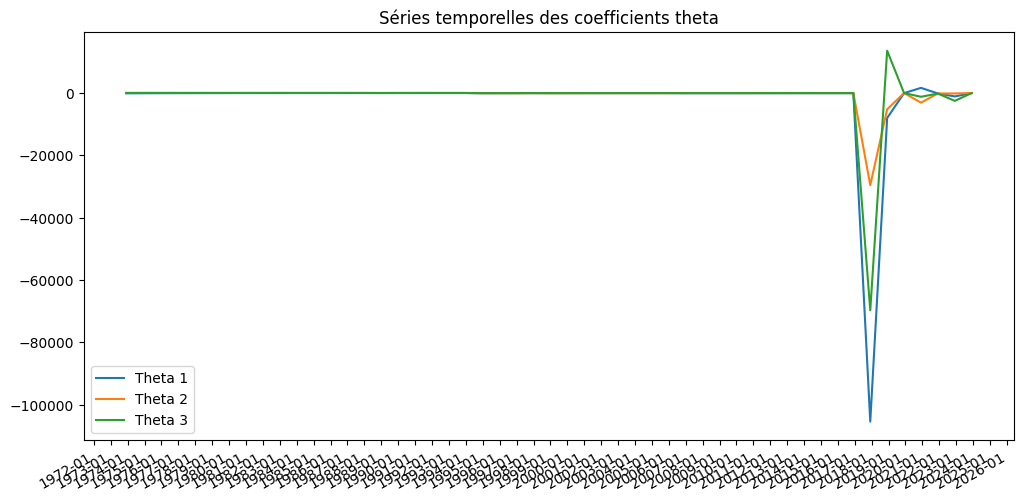

/Users/thomasdeconinck/Downloads/Gestion-de-Portefeuille-Devoir-2/TP2_File/Functions.py:933: RuntimeWarning: invalid value encountered in divide
  normalized_weights = positive_weights / np.sum(positive_weights)


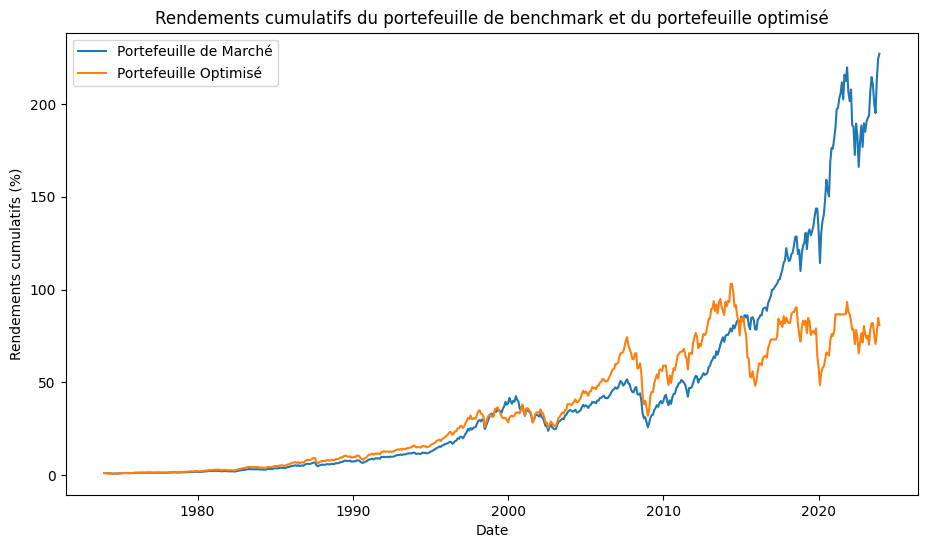

In [21]:
# Optimisation des trois coefficients du modèle (selon l'équation (6) de l'article), en minimisant l'utilité espérée négative CRRA, équivalent à maximiser l'utilité, 
# et en utilisant comme valeurs initiales les coefficients moyens estimés à partir de la régression sur la période de temps T:

optimal_thetas            = f.Expanding_window_optimization(df_48Ind, mkt_weights, MC_standardized, BM_standardized, MOM_standardized, returns)
optimal_thetas

# Plot les séries temporelles pour chaque coefficient theta estimés à partir de à travers T périodes de temps.
time_series_optimal_theta = f.plot_theta_series(optimal_thetas)
time_series_optimal_theta

# Formation des poids de portefeuilles optimisés pour chaque période de temps t mensuel, en utilisant les coefficients thetas estimés annuellement 
# et les données standardisées des 3 caractéristiques pour chaque période mensuelle t.
opt_weights_monthly       = f.calculate_optimized_weights_monthly(mkt_weights, MC_standardized, BM_standardized, MOM_standardized, optimal_thetas)
opt_weights_monthly

# Calcul des rendements mensuels des portefeuilles optimisés et du portefeuille de marché pour chaque période de temps t, en utilisant les poids de portefeuilles optimisés
optimized_port_returns, market_port_returns  =  f.calculate_portfolio_returns(opt_weights_monthly, mkt_weights, returns)


# Résultats et comparaison des portefeuilles optimisés et du portefeuille de marché, selon la première méthode d'initialisation des coefficients thetas 
# (moyenne des coefficients estimés à travers les périodes de temps T):

# 1) Calculer le rendement annuel moyen annualisés, la volatilité moyenne annualisée et le ratio de Sharpe pour le portefeuille optimisé et le portefeuille de marché
Sharpe_ratio_df          = f.annualized_statistics_and_sharpe_ratios({
    'Optimized Portfolio': optimized_port_returns,
    'Market Portfolio': market_port_returns},
[('1974-01-01', '2023-12-01')],df_rf, is_decimal=True)
Sharpe_ratio_df

# 2) Calculer les rendements cumulés pour le portefeuille optimisé et le portefeuille de marché et tracer ces rendements cumulés 
strategies              = [ 'Portefeuille de Marché', 'Portefeuille Optimisé']

f.plot_cumulative_returns_partC({
    'Portefeuille Optimisé': optimized_port_returns,
    'Portefeuille de Marché': market_port_returns
}, strategies)

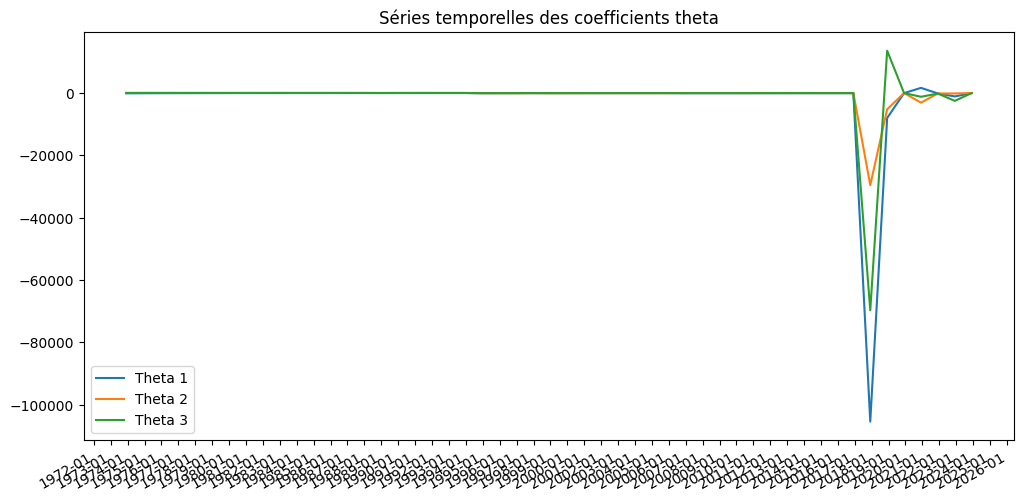

/Users/thomasdeconinck/Downloads/Gestion-de-Portefeuille-Devoir-2/TP2_File/Functions.py:933: RuntimeWarning: invalid value encountered in divide
  normalized_weights = positive_weights / np.sum(positive_weights)


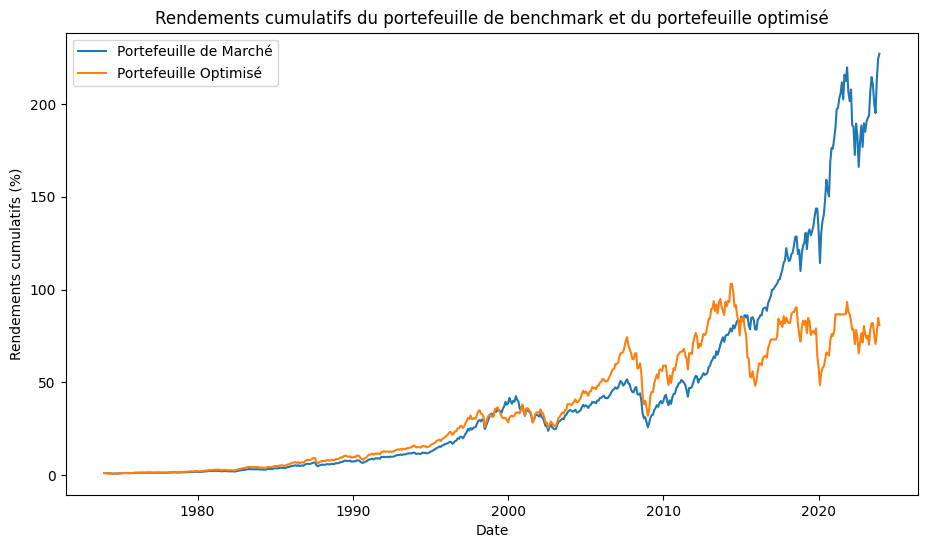

In [22]:
# Seconde methode pour l'optimisation des trois coefficients du modèle (selon l'équation (6) de l'article) toujours en minimisant l'utilité espérée négative, 
# mais en rééstimant la valeur de theta initiale pour chaque itération de la window à partir des coefficients thetas optimaux estimés à la période précédente:

optimal_thetas_second_method            = f.Expanding_window_optimization_last_period_initial_theta(df_48Ind, mkt_weights, MC_standardized, BM_standardized, MOM_standardized, returns)
optimal_thetas_second_method

# Plot les séries temporelles pour chaque coefficient theta à travers T périodes de temps en utilisant la seconde méthode d'optimisation,
# avec les valeurs initiales des coefficients optimaux thetas estimés à partir de la période de temps précédente.
time_series_optimal_theta_second_method = f.plot_theta_series(optimal_thetas_second_method)
time_series_optimal_theta_second_method

# Formation des poids de portefeuilles optimisés pour chaque période de temps t mensuel, en utilisant les coefficients thetas estimés annuellement 
# et les données standardisées des 3 caractéristiques pour chaque période mensuelle t.
opt_weights_monthly_second_method      = f.calculate_optimized_weights_monthly(mkt_weights, MC_standardized, BM_standardized, MOM_standardized, optimal_thetas_second_method)
opt_weights_monthly_second_method

# Calcul des rendements mensuels des portefeuilles optimisés et du portefeuille de marché pour chaque période de temps t, en utilisant les poids de portefeuilles optimisés selon la seconde méthode.
optimized_port_returns_second_method, market_port_returns_second_method  = f.calculate_portfolio_returns(opt_weights_monthly_second_method, mkt_weights, returns)



# Résultats et comparaison des portefeuilles optimisés et du portefeuille de marché, pour la seconde méthode d'initialisation des coefficients thetas:

# 1) Calculer le rendement annuel moyen annualisé, la volatilité moyenne annualisée et le ratio de Sharpe pour le portefeuille optimisé et le portefeuille de marché
Sharpe_ratio_df                       = f.annualized_statistics_and_sharpe_ratios({
    'Optimized Portfolio': optimized_port_returns_second_method,
    'Market Portfolio': market_port_returns_second_method},
[('1974-01-01', '2023-12-01')],df_rf, is_decimal=True)
Sharpe_ratio_df

# 2) Calculer les rendements cumulés pour le portefeuille optimisé et le portefeuille de marché et tracer ces rendements cumulés
strategies                           = [ 'Portefeuille de Marché', 'Portefeuille Optimisé']

f.plot_cumulative_returns_partC({
    'Portefeuille Optimisé': optimized_port_returns_second_method,
    'Portefeuille de Marché': market_port_returns_second_method
}, strategies)